In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(".\\Dataset\\Mall_Customers.csv")
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df.shape

(200, 5)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre', ylabel='count'>

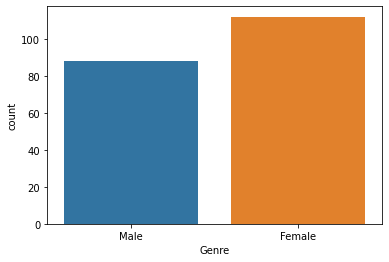

In [24]:
sns.countplot('Genre',data = df)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

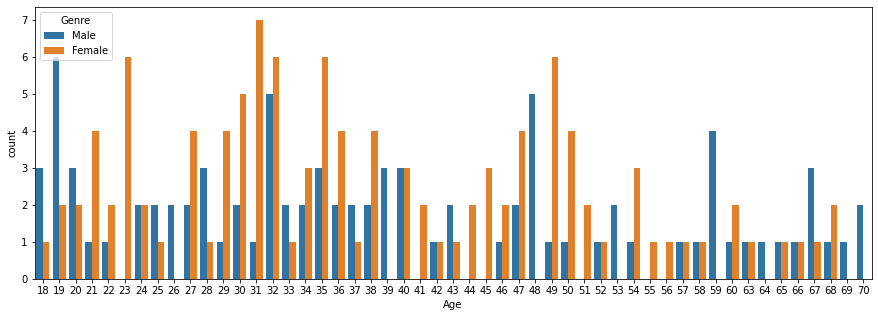

In [25]:
plt.figure(figsize=(15,5))
sns.countplot('Age',hue = 'Genre',data=df)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


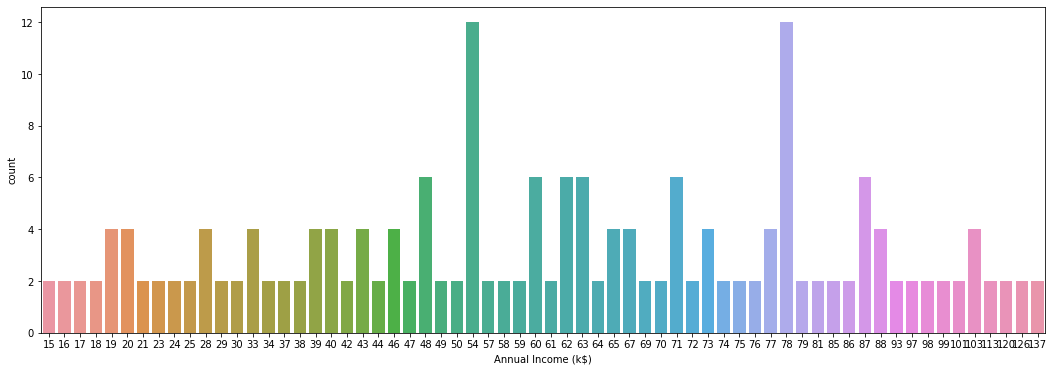

In [26]:
f,ax = plt.subplots(figsize=(18,6))
ax = sns.countplot('Annual Income (k$)',data=df)

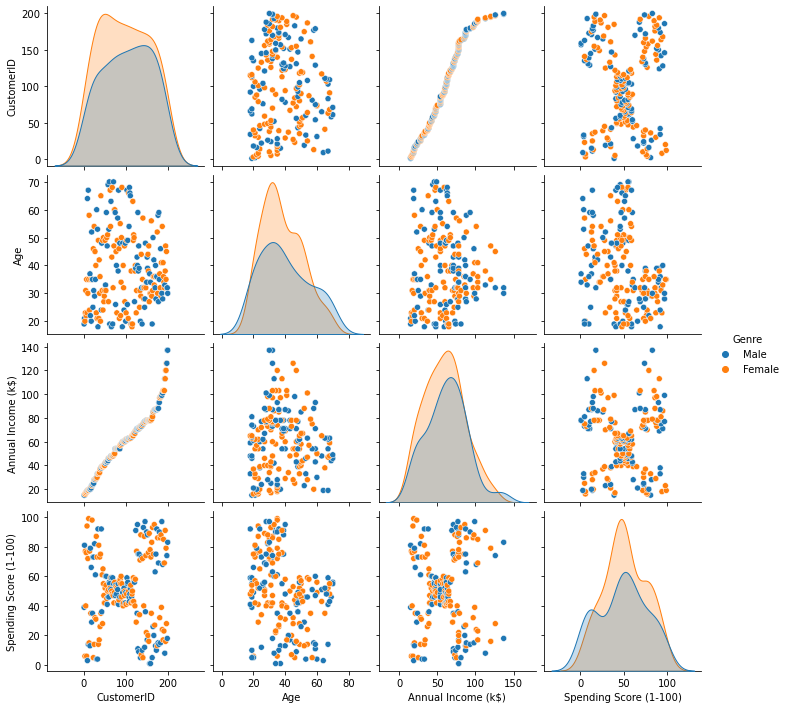

In [27]:
sns.pairplot(df,hue='Genre')

In [29]:
df = df.drop(['Genre','CustomerID'],axis = 1)

In [30]:
df.head(5)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [40]:
from sklearn.cluster import KMeans
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)
clusters

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[308812.7800000001,
 212840.16982097193,
 143342.75157170597,
 104366.151455562,
 75479.76429338777,
 58300.443321590676,
 51426.14664502165,
 44307.87341670445,
 40798.68774656604,
 37072.663410424895]

<AxesSubplot:>

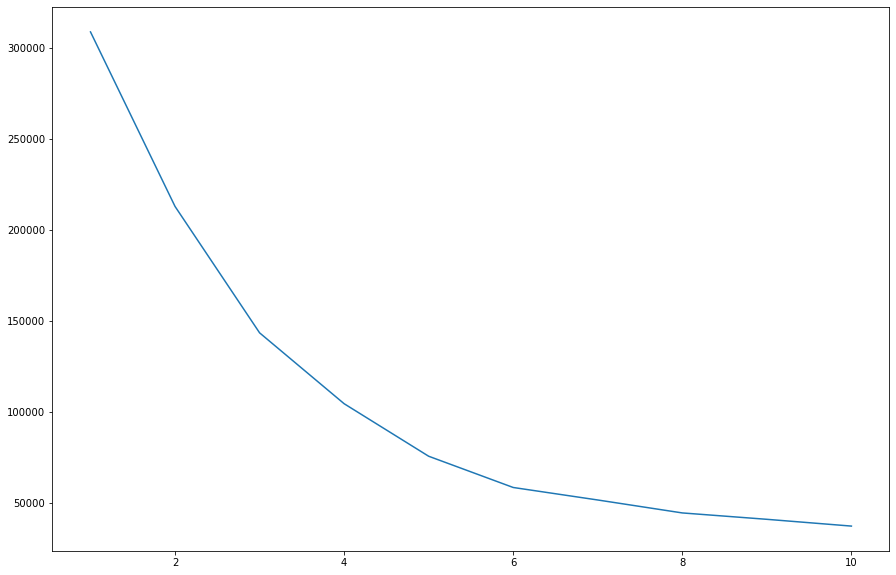

In [41]:
plt.figure(figsize=(15,10))
sns.lineplot(x= list(range(1,11)),y=clusters)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


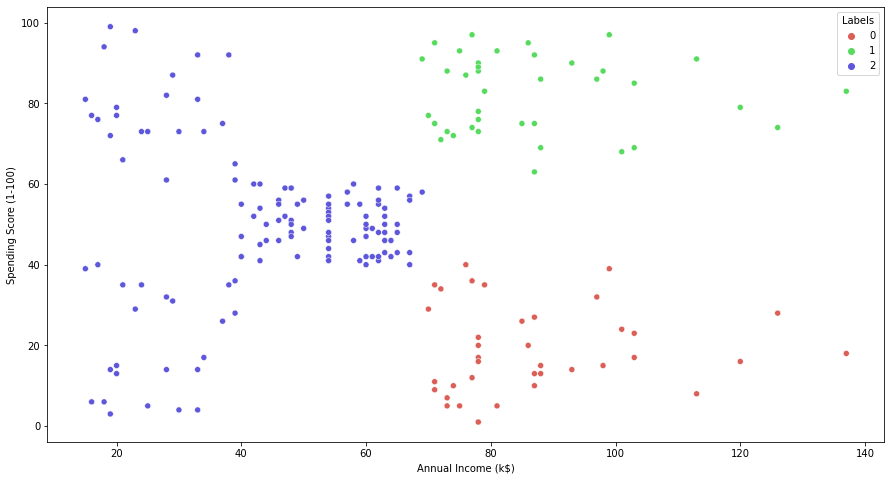

In [43]:
km3 = KMeans(n_clusters=3).fit(df)
df['Labels'] = km3.labels_
plt.figure(figsize=(15,8))
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=df['Labels'],palette=sns.color_palette('hls',3))
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


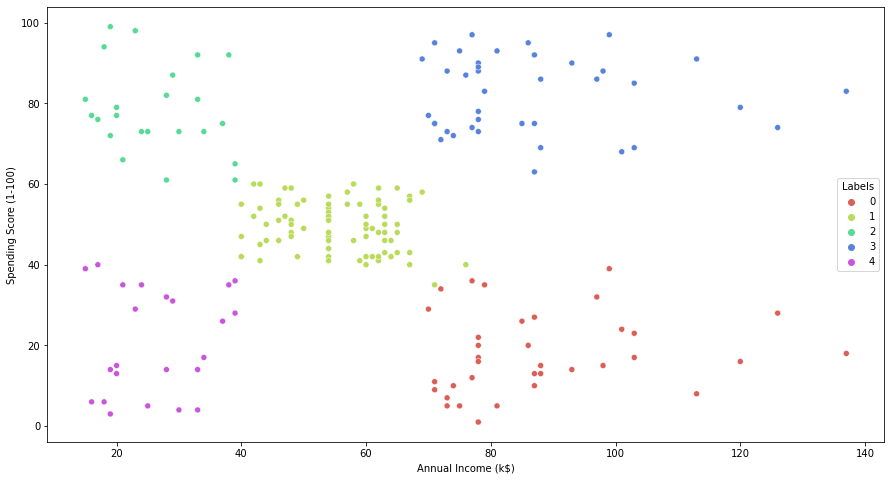

In [54]:
km5 = KMeans(n_clusters=5).fit(df)
df['Labels'] = km5.labels_
plt.figure(figsize=(15,8))
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=df['Labels'],palette=sns.color_palette('hls',5))
plt.show()